# Indian Liver Patient Records 
### Patient records collected from North East of Andhra Pradesh, India

## Predicting liver disease using logistic regression

#### Name: Roshan Wahane
#### Date: 22/05/2019

### Context

Patients with Liver disease have been continuously increasing because of excessive consumption of alcohol, inhale of harmful gases, intake of contaminated food, pickles and drugs. This dataset was used to evaluate prediction algorithms in an effort to reduce burden on doctors.

### Content
This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease) or not (no disease). This data set contains 441 male patient records and 142 female patient records.

Any patient whose age exceeded 89 is listed as being of age "90".

### Columns:

- Age of the patient
- Gender of the patient
- Total Bilirubin
- Direct Bilirubin
- Alkaline Phosphotase
- Alamine Aminotransferase
- Aspartate Aminotransferase
- Total Protiens
- Albumin
- Albumin and Globulin Ratio
- Dataset: field used to split the data into two sets (patient with liver disease, or no disease)

#### Acknowledgements
This dataset was downloaded from the UCI ML Repository:

Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

#### Inspiration
Use these patient records to determine which patients have liver disease and which ones do not.

Load required libraries

In [44]:
library(dplyr)
library(ggplot2)
library(corrplot)
library(e1071)
library(caret)

corrplot 0.84 loaded


### Exploratory Data Analysis

We will first perform some basic EDA on the dataset to understand further about the features of the data, the datatype, to check if there is any missing data, discrepancy in data, perform data cleanup and preprocessing. We will also check the correlation between the variables which will further give us an idea about the data behavior.

We will first begin with loading the dataset.

In [2]:
il <- read.csv("indian_liver_patient.csv", header=TRUE, sep=",")

In [3]:
head(il)

Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1


Print the column names

In [4]:
names(il)

[1] "Age"                        "Gender"                    
 [3] "Total_Bilirubin"            "Direct_Bilirubin"          
 [5] "Alkaline_Phosphotase"       "Alamine_Aminotransferase"  
 [7] "Aspartate_Aminotransferase" "Total_Protiens"            
 [9] "Albumin"                    "Albumin_and_Globulin_Ratio"
[11] "Dataset"

Check the structure of the dataset.

In [5]:
str(il)

'data.frame':	583 obs. of  11 variables:
 $ Age                       : int  65 62 62 58 72 46 26 29 17 55 ...
 $ Gender                    : Factor w/ 2 levels "Female","Male": 1 2 2 2 2 2 1 1 2 2 ...
 $ Total_Bilirubin           : num  0.7 10.9 7.3 1 3.9 1.8 0.9 0.9 0.9 0.7 ...
 $ Direct_Bilirubin          : num  0.1 5.5 4.1 0.4 2 0.7 0.2 0.3 0.3 0.2 ...
 $ Alkaline_Phosphotase      : int  187 699 490 182 195 208 154 202 202 290 ...
 $ Alamine_Aminotransferase  : int  16 64 60 14 27 19 16 14 22 53 ...
 $ Aspartate_Aminotransferase: int  18 100 68 20 59 14 12 11 19 58 ...
 $ Total_Protiens            : num  6.8 7.5 7 6.8 7.3 7.6 7 6.7 7.4 6.8 ...
 $ Albumin                   : num  3.3 3.2 3.3 3.4 2.4 4.4 3.5 3.6 4.1 3.4 ...
 $ Albumin_and_Globulin_Ratio: num  0.9 0.74 0.89 1 0.4 1.3 1 1.1 1.2 1 ...
 $ Dataset                   : int  1 1 1 1 1 1 1 1 2 1 ...


Get the summary on the dataset. This will provide us with further analysis.

In [6]:
summary(il)

      Age           Gender    Total_Bilirubin  Direct_Bilirubin
 Min.   : 4.00   Female:142   Min.   : 0.400   Min.   : 0.100  
 1st Qu.:33.00   Male  :441   1st Qu.: 0.800   1st Qu.: 0.200  
 Median :45.00                Median : 1.000   Median : 0.300  
 Mean   :44.75                Mean   : 3.299   Mean   : 1.486  
 3rd Qu.:58.00                3rd Qu.: 2.600   3rd Qu.: 1.300  
 Max.   :90.00                Max.   :75.000   Max.   :19.700  
                                                               
 Alkaline_Phosphotase Alamine_Aminotransferase Aspartate_Aminotransferase
 Min.   :  63.0       Min.   :  10.00          Min.   :  10.0            
 1st Qu.: 175.5       1st Qu.:  23.00          1st Qu.:  25.0            
 Median : 208.0       Median :  35.00          Median :  42.0            
 Mean   : 290.6       Mean   :  80.71          Mean   : 109.9            
 3rd Qu.: 298.0       3rd Qu.:  60.50          3rd Qu.:  87.0            
 Max.   :2110.0       Max.   :2000.00       

Check for columns with missing values

In [7]:
colSums(sapply(il, is.na))

Age                     Gender 
                         0                          0 
           Total_Bilirubin           Direct_Bilirubin 
                         0                          0 
      Alkaline_Phosphotase   Alamine_Aminotransferase 
                         0                          0 
Aspartate_Aminotransferase             Total_Protiens 
                         0                          0 
                   Albumin Albumin_and_Globulin_Ratio 
                         0                          4 
                   Dataset 
                         0

- Since logistic regression is a type of classification model which helps with predicting a single value to a question (True or False) for example in the given case if the patient has liver disease or not then it will be most helpful to have binary values in the dataset. But as we can see from the summary of the Indian Patient liver dataset that Dataset column has values 1 and 2 for liver disease or no liver disease then these values will first need to be converted in to binary values. So having binary values will gives the probability from 0 to 1 that the patient has liver disease.

- As per the description of our dataset, it says that value 1 refers to the patients having the liver disease and value 2 refers to patients not having the liver disease. So we can convert value 2 to 0. So now 0 will represent patients without liver disease and value 1 are the patients with liver disease.

- We can also see that the datatype of the Dataset column is int. So we can change this to a factor datatype.

- We can also change the name of the Dataset column to something meaningful to represent the data in it.

- In the above summary we can see that there are 4 NA values in the "Albumin_and_Globulin_Ratio" column. So, we can remove the NA's from that column.

Change the column name "Dataset" to "Liver_Disease"

In [8]:
colnames(il)[colnames(il)=='Dataset'] = 'Liver_Disease'

In [9]:
names(il)

[1] "Age"                        "Gender"                    
 [3] "Total_Bilirubin"            "Direct_Bilirubin"          
 [5] "Alkaline_Phosphotase"       "Alamine_Aminotransferase"  
 [7] "Aspartate_Aminotransferase" "Total_Protiens"            
 [9] "Albumin"                    "Albumin_and_Globulin_Ratio"
[11] "Liver_Disease"

Change the response variable "Liver_Disease" values to 0 and 1 as we will be converting this into a factor variable to represent its categorical nature

In [10]:
il$Liver_Disease[il$Liver_Disease == 2] <- 0

In [11]:
head(il, n=10)

Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,0
55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [12]:
table(il$Liver_Disease)


  0   1 
167 416 

From above we can say that we have 167 patients without liver disease and 416 patients with liver disease

We will also change the datatype of the response variable to factor from int

In [13]:
il$Liver_Disease = as.factor(il$Liver_Disease)

In the next step we want to handle the missing values. We previously noticed that we have 4 missing values in "Albumin and Globulin Ratio" column.

Print missing value rows

In [14]:
il %>% filter_all(any_vars(is.na(.))) 

Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
45,Female,0.9,0.3,189,23,33,6.6,3.9,NA,1
51,Male,0.8,0.2,230,24,46,6.5,3.1,NA,1
35,Female,0.6,0.2,180,12,15,5.2,2.7,NA,0
27,Male,1.3,0.6,106,25,54,8.5,4.8,NA,0


Check percentage of missing values. Performing this step to check if it is simply easy to remove these missing values from the dataset. Since we are dealing with health data, imputing missing values is always tricky as you do not want to make assumptions or impute incorrect values. Removing will be the easiest as it should not affect model performance as much.

In [15]:
sum(is.na(il))/prod(dim(il)) #mean(is.na(il))

[1] 0.000623733

Very small fraction of missing values. So we can conclude that it is safe to remove these values from the dataset.

In [16]:
il = na.omit(il)

In [17]:
str(il)

'data.frame':	579 obs. of  11 variables:
 $ Age                       : int  65 62 62 58 72 46 26 29 17 55 ...
 $ Gender                    : Factor w/ 2 levels "Female","Male": 1 2 2 2 2 2 1 1 2 2 ...
 $ Total_Bilirubin           : num  0.7 10.9 7.3 1 3.9 1.8 0.9 0.9 0.9 0.7 ...
 $ Direct_Bilirubin          : num  0.1 5.5 4.1 0.4 2 0.7 0.2 0.3 0.3 0.2 ...
 $ Alkaline_Phosphotase      : int  187 699 490 182 195 208 154 202 202 290 ...
 $ Alamine_Aminotransferase  : int  16 64 60 14 27 19 16 14 22 53 ...
 $ Aspartate_Aminotransferase: int  18 100 68 20 59 14 12 11 19 58 ...
 $ Total_Protiens            : num  6.8 7.5 7 6.8 7.3 7.6 7 6.7 7.4 6.8 ...
 $ Albumin                   : num  3.3 3.2 3.3 3.4 2.4 4.4 3.5 3.6 4.1 3.4 ...
 $ Albumin_and_Globulin_Ratio: num  0.9 0.74 0.89 1 0.4 1.3 1 1.1 1.2 1 ...
 $ Liver_Disease             : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 1 2 ...
 - attr(*, "na.action")= 'omit' Named int  210 242 254 313
  ..- attr(*, "names")= chr  "210" "242" "254"

In [18]:
colSums(sapply(il, is.na))

Age                     Gender 
                         0                          0 
           Total_Bilirubin           Direct_Bilirubin 
                         0                          0 
      Alkaline_Phosphotase   Alamine_Aminotransferase 
                         0                          0 
Aspartate_Aminotransferase             Total_Protiens 
                         0                          0 
                   Albumin Albumin_and_Globulin_Ratio 
                         0                          0 
             Liver_Disease 
                         0

We can see that we have sucessfully removed the missing values from the dataset.

Next, I am curious to see how many people in this dataset are males and how many are females. I am also curious to see how many males and females have liver disease to determine if males have liver disease more than females.

In [19]:
table(il$Gender)


Female   Male 
   140    439 

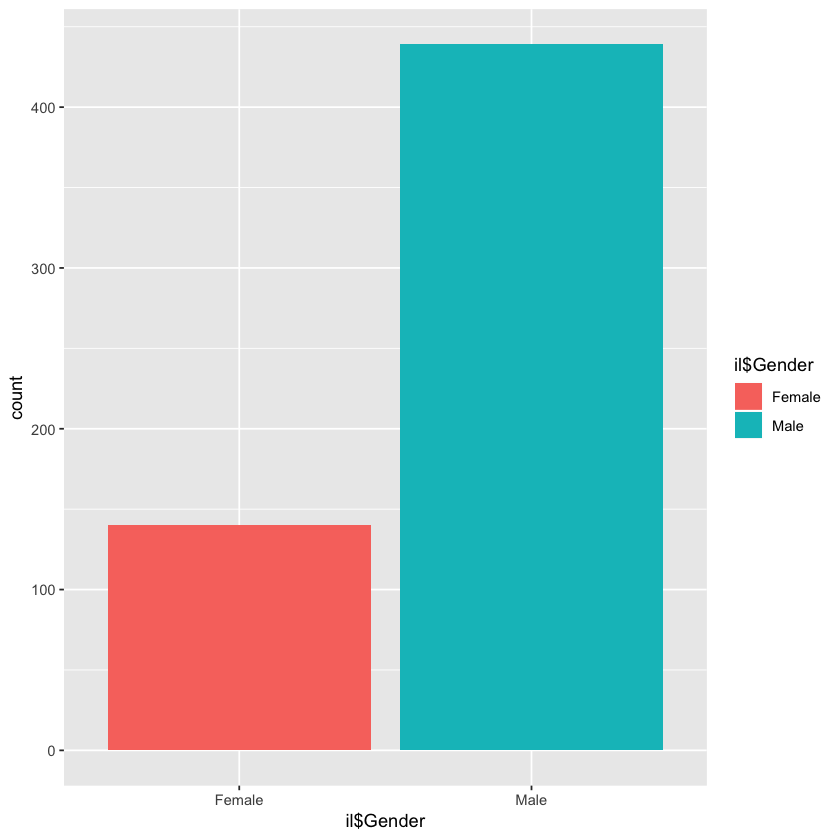

In [20]:
ggplot(il, aes(il$Gender))+
geom_bar(aes(fill=il$Gender))

In [21]:
peopld = filter(il, il$Liver_Disease == 1) # subset of dataframe of people with liver disease

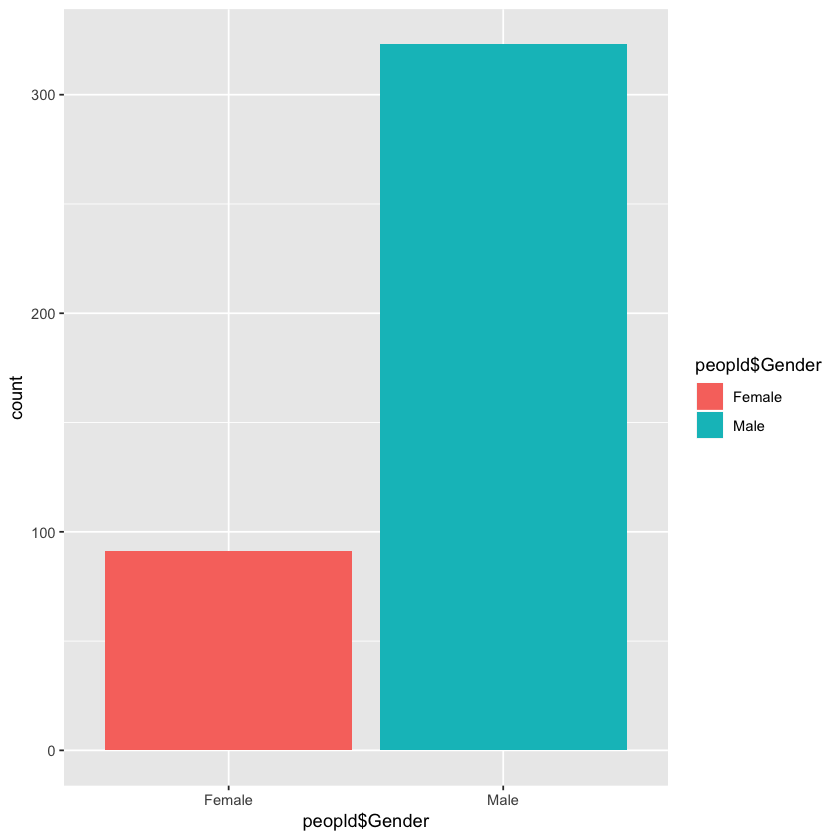

In [22]:
ggplot(peopld, aes(peopld$Gender))+
geom_bar(aes(fill=peopld$Gender))

In [23]:
ldm = nrow(filter(il, (il$Gender=="Male" & il$Liver_Disease == 1)))

In [24]:
ldf = nrow(filter(il, (il$Gender=="Female" & il$Liver_Disease == 1)))

In [25]:
print(paste("Number of males with liver disease are: ", ldm))

[1] "Number of males with liver disease are:  323"


In [26]:
print(paste("Number of females with liver disease are: ", ldf))

[1] "Number of females with liver disease are:  91"


As we can see out of 439 males 323 (73.57%) are suffering from liver disease and out of 140 females 93 (66.42%) are suffering from liver disease in this dataset. Although not by much but we can see that males suffer more with liver disease than females in this sample population. So Gender is definitely not the primary cause for liver disease.

#### Correlation Matrix

In [40]:
# exclude variables Gender, Liver_Disease as they are categorical
myvars <- names(il) %in% c("Gender", "Liver_Disease")
newdata <- il[!myvars]

In [41]:
head(newdata)

Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
65,0.7,0.1,187,16,18,6.8,3.3,0.90
62,10.9,5.5,699,64,100,7.5,3.2,0.74
62,7.3,4.1,490,60,68,7.0,3.3,0.89
58,1.0,0.4,182,14,20,6.8,3.4,1.00
72,3.9,2.0,195,27,59,7.3,2.4,0.40
46,1.8,0.7,208,19,14,7.6,4.4,1.30


In [47]:
cor_il <- cor(newdata)

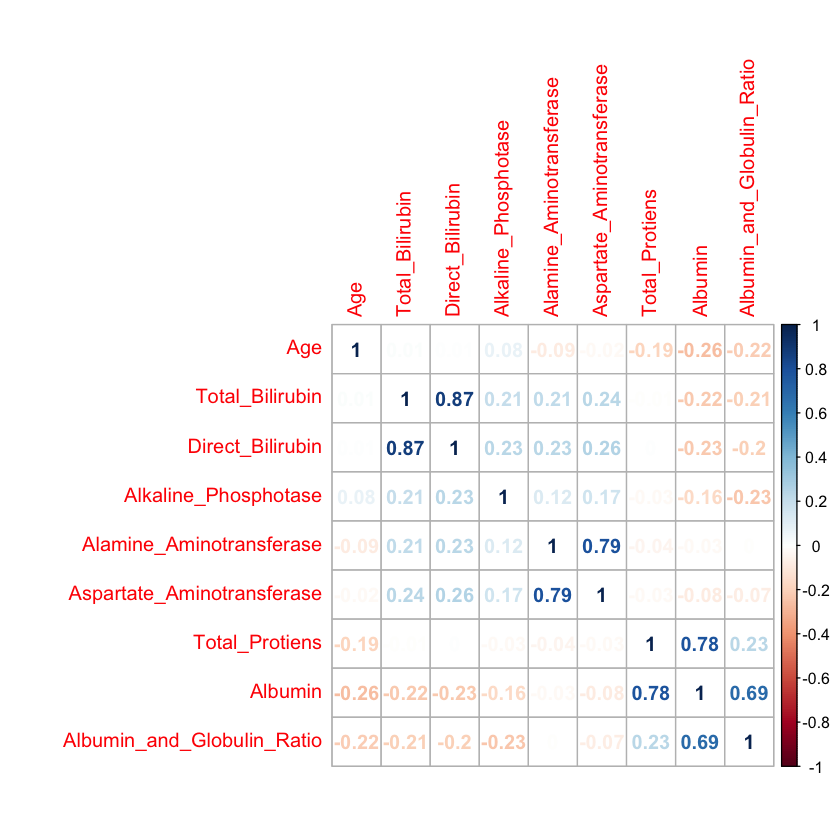

In [52]:
corrplot(cor_il, method="number")

In the above correlation matrix we can analyse that some of the features have correlation with each other such as Direct Bilirubin and Total Bilirubin also Aspartate Aminotransferase and Alamine Aminotransferase. I would consider removing one of the features of each of those pairs but as per my analysis it is still not too high for me to remove them. I would have removed it if the correlation was more than 90 between the features. However, I will keep this statistic in mind to see if both the features from each pair is being considered by the model and if it includes both the features from the pair then I would definitely consider removing one of them to make the model complexity simpler.

### Machine Learning

In the next step we will begin with building our machine learning model, to do this we will first split the data in training and testing sets.

We will first begin with building a logistic regression model which will include all the available features of the dataset. The statistics of this model will provide us with some important information such as the AIC value, which features are most significant to predict the response variable, etc.

Then we will continue with building logistic regression using hybrid stepwise selection method which will run in both forward and backward directions to evaluate possible combinations of the features.

In [29]:
# split data into training and testing sets
smp_siz = floor(0.75*nrow(il))  # creates a value for dividing the data into train and test. In this case the value is defined as 75% of the number of rows in the dataset
smp_siz  # shows the value of the sample size

[1] 434

In [30]:
set.seed(3)   # set seed to ensure you always have same random numbers generated
train_ind = sample(seq_len(nrow(il)),size = smp_siz)  # Randomly identifies therows equal to sample size ( defined in previous instruction) from  all the rows of Smarket dataset and stores the row number in train_ind
train = il[train_ind,] #creates the training dataset with row numbers stored in train_ind
test = il[-train_ind,]  # creates the test dataset excluding the row numbers mentioned in train_ind

In [31]:
head(train)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
98,39,Male,6.6,3.0,215,190,950,4.0,1.7,0.70,1
471,66,Male,1.1,0.5,167,13,56,7.1,4.1,1.36,1
224,50,Male,1.1,0.3,175,20,19,7.1,4.5,1.70,0
189,60,Male,1.9,0.8,614,42,38,4.5,1.8,0.60,1
351,37,Male,1.8,0.8,145,62,58,5.7,2.9,1.00,1
579,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0


In [32]:
head(test)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Liver_Disease
1,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
2,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
4,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
7,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
16,25,Male,0.6,0.1,183,91,53,5.5,2.3,0.70,0
21,51,Male,2.2,1.0,610,17,28,7.3,2.6,0.55,1


In [33]:
glm.fit = glm(Liver_Disease ~ . , data = train, family = binomial)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [34]:
summary(glm.fit)


Call:
glm(formula = Liver_Disease ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.2120  -1.0208   0.3000   0.8736   1.5093  

Coefficients:
                             Estimate Std. Error z value Pr(>|z|)   
(Intercept)                -3.1182472  1.4912438  -2.091  0.03652 * 
Age                         0.0148237  0.0074514   1.989  0.04666 * 
GenderMale                  0.0220650  0.2752200   0.080  0.93610   
Total_Bilirubin             0.0024016  0.0702782   0.034  0.97274   
Direct_Bilirubin            0.4544035  0.2672373   1.700  0.08906 . 
Alkaline_Phosphotase        0.0011708  0.0009269   1.263  0.20652   
Alamine_Aminotransferase    0.0225983  0.0078399   2.882  0.00395 **
Aspartate_Aminotransferase  0.0016287  0.0043123   0.378  0.70567   
Total_Protiens              0.8555067  0.4140979   2.066  0.03883 * 
Albumin                    -1.6074039  0.7998331  -2.010  0.04447 * 
Albumin_and_Globulin_Ratio  1.3630479  

As we can see from the above summary statistics, the AIC value of the full default logistic model is 430.38 with significant features such as Age, Direct_Bilirubin, Alamine_Aminotransferase, Total_Protiens and Albumin. Let us see if we can improve the model with stepwise selection method.

In [35]:
step_il <- step(glm.fit, direction="both")

Start:  AIC=430.38
Liver_Disease ~ Age + Gender + Total_Bilirubin + Direct_Bilirubin + 
    Alkaline_Phosphotase + Alamine_Aminotransferase + Aspartate_Aminotransferase + 
    Total_Protiens + Albumin + Albumin_and_Globulin_Ratio



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                             Df Deviance    AIC
- Total_Bilirubin             1   408.38 428.38
- Gender                      1   408.38 428.38
- Aspartate_Aminotransferase  1   408.53 428.53
- Albumin_and_Globulin_Ratio  1   409.78 429.78
- Direct_Bilirubin            1   409.90 429.90
<none>                            408.38 430.38
- Alkaline_Phosphotase        1   410.38 430.38
- Age                         1   412.38 432.38
- Albumin                     1   412.84 432.84
- Total_Protiens              1   412.96 432.96
- Alamine_Aminotransferase    1   420.20 440.20


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=428.38
Liver_Disease ~ Age + Gender + Direct_Bilirubin + Alkaline_Phosphotase + 
    Alamine_Aminotransferase + Aspartate_Aminotransferase + Total_Protiens + 
    Albumin + Albumin_and_Globulin_Ratio



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                             Df Deviance    AIC
- Gender                      1   408.38 426.38
- Aspartate_Aminotransferase  1   408.53 426.53
- Albumin_and_Globulin_Ratio  1   409.78 427.78
<none>                            408.38 428.38
- Alkaline_Phosphotase        1   410.38 428.38
+ Total_Bilirubin             1   408.38 430.38
- Age                         1   412.39 430.39
- Albumin                     1   412.84 430.84
- Total_Protiens              1   412.96 430.96
- Direct_Bilirubin            1   416.97 434.97
- Alamine_Aminotransferase    1   420.20 438.20


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=426.38
Liver_Disease ~ Age + Direct_Bilirubin + Alkaline_Phosphotase + 
    Alamine_Aminotransferase + Aspartate_Aminotransferase + Total_Protiens + 
    Albumin + Albumin_and_Globulin_Ratio



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                             Df Deviance    AIC
- Aspartate_Aminotransferase  1   408.53 424.53
- Albumin_and_Globulin_Ratio  1   409.80 425.80
<none>                            408.38 426.38
- Alkaline_Phosphotase        1   410.39 426.39
+ Gender                      1   408.38 428.38
+ Total_Bilirubin             1   408.38 428.38
- Age                         1   412.41 428.41
- Albumin                     1   412.86 428.86
- Total_Protiens              1   412.97 428.97
- Direct_Bilirubin            1   416.99 432.99
- Alamine_Aminotransferase    1   420.31 436.31


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=424.53
Liver_Disease ~ Age + Direct_Bilirubin + Alkaline_Phosphotase + 
    Alamine_Aminotransferase + Total_Protiens + Albumin + Albumin_and_Globulin_Ratio



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                             Df Deviance    AIC
- Albumin_and_Globulin_Ratio  1   410.16 424.16
<none>                            408.53 424.53
- Alkaline_Phosphotase        1   410.57 424.57
+ Aspartate_Aminotransferase  1   408.38 426.38
- Age                         1   412.50 426.50
+ Gender                      1   408.53 426.53
+ Total_Bilirubin             1   408.53 426.53
- Total_Protiens              1   413.42 427.42
- Albumin                     1   413.45 427.45
- Direct_Bilirubin            1   418.17 432.17
- Alamine_Aminotransferase    1   442.72 456.72


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=424.16
Liver_Disease ~ Age + Direct_Bilirubin + Alkaline_Phosphotase + 
    Alamine_Aminotransferase + Total_Protiens + Albumin



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                             Df Deviance    AIC
- Alkaline_Phosphotase        1   411.79 423.79
<none>                            410.16 424.16
+ Albumin_and_Globulin_Ratio  1   408.53 424.53
+ Aspartate_Aminotransferase  1   409.80 425.80
+ Gender                      1   410.13 426.13
+ Total_Bilirubin             1   410.16 426.16
- Age                         1   414.19 426.19
- Total_Protiens              1   414.65 426.65
- Albumin                     1   417.02 429.02
- Direct_Bilirubin            1   422.29 434.29
- Alamine_Aminotransferase    1   443.44 455.44


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Step:  AIC=423.79
Liver_Disease ~ Age + Direct_Bilirubin + Alamine_Aminotransferase + 
    Total_Protiens + Albumin



Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

                             Df Deviance    AIC
<none>                            411.79 423.79
+ Alkaline_Phosphotase        1   410.16 424.16
+ Albumin_and_Globulin_Ratio  1   410.57 424.57
+ Aspartate_Aminotransferase  1   411.41 425.41
- Age                         1   415.62 425.62
+ Gender                      1   411.77 425.77
+ Total_Bilirubin             1   411.79 425.79
- Total_Protiens              1   417.20 427.20
- Albumin                     1   420.03 430.03
- Direct_Bilirubin            1   425.64 435.64
- Alamine_Aminotransferase    1   451.31 461.31


In [36]:
summary(step_il)


Call:
glm(formula = Liver_Disease ~ Age + Direct_Bilirubin + Alamine_Aminotransferase + 
    Total_Protiens + Albumin, family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8654  -0.9949   0.3091   0.8797   1.5893  

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -1.620277   0.955489  -1.696  0.08993 .  
Age                       0.014426   0.007426   1.943  0.05206 .  
Direct_Bilirubin          0.537174   0.217905   2.465  0.01369 *  
Alamine_Aminotransferase  0.025711   0.005981   4.299 1.72e-05 ***
Total_Protiens            0.481771   0.209592   2.299  0.02153 *  
Albumin                  -0.828998   0.294110  -2.819  0.00482 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 517.45  on 433  degrees of freedom
Residual deviance: 411.79  on 428  degrees of freedom
AIC: 423.79

Nu

We now have our final model as per the stepwise regression. We can see that the value of AIC has dropped which means that this model is better than the full default logistic regression model. This model includes 5 features which will contribute towards predicting the response variable "Liver Disease".

Lets use this model to make predictions on the test dataset now.

In [37]:
predict_il <- predict(step_il, type = "response", newdata = test)

In [38]:
predicted <- ifelse(predict_il>0.51,1,0) # set cutoff limit

In [39]:
confusionMatrix(as.factor(predicted), as.factor(test$Liver_Disease))

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 12 12
         1 30 91
                                          
               Accuracy : 0.7103          
                 95% CI : (0.6293, 0.7826)
    No Information Rate : 0.7103          
    P-Value [Acc > NIR] : 0.541514        
                                          
                  Kappa : 0.1938          
 Mcnemar's Test P-Value : 0.008712        
                                          
            Sensitivity : 0.28571         
            Specificity : 0.88350         
         Pos Pred Value : 0.50000         
         Neg Pred Value : 0.75207         
             Prevalence : 0.28966         
         Detection Rate : 0.08276         
   Detection Prevalence : 0.16552         
      Balanced Accuracy : 0.58460         
                                          
       'Positive' Class : 0               
                                          

From the confusion matrix statistics we can see that the accuracy of the model is 71% and with low sensitivity and high specificity we can conclude that our model did a good job with predicting patients who did not have liver disease.